In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("../given/practical1/inpatientCharges.csv")
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [39]:
data.dtypes

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object

In [40]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [41]:
data = data.rename(columns={" Total Discharges ":"Total Discharges"," Average Covered Charges ": "Average Covered Charges", " Average Total Payments ": "Average Total Payments" })

In [42]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [43]:
data[["procedure_code", "procedure"]] = pd.DataFrame(data["DRG Definition"].str.split(" - ").to_list())
data = data.drop(["DRG Definition"], axis=1)
data.head()

,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,procedure_code,procedure
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [44]:
data[["Average Covered Charges", "Average Total Payments", "Average Medicare Payments"]] =pd.DataFrame([data["Average Covered Charges"].str.lstrip("$").astype("float64"), data["Average Total Payments"].str.lstrip("$").astype("float64"), data["Average Medicare Payments"].str.lstrip("$").astype("float64")]).T

In [45]:
data.head()

,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,procedure_code,procedure
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,039,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,039,EXTRACRANIAL PROCEDURES W/O CC/MCC


# Provider name

## patients processed by provider name

Provider Name
GOOD SAMARITAN HOSPITAL              633
ST JOSEPH MEDICAL CENTER             427
MERCY MEDICAL CENTER                 357
MERCY HOSPITAL                       347
ST JOSEPH HOSPITAL                   343
ST FRANCIS MEDICAL CENTER            277
ST MARY MEDICAL CENTER               264
ST LUKES HOSPITAL                    259
ST FRANCIS HOSPITAL                  253
JEFFERSON REGIONAL MEDICAL CENTER    232
Name: Provider Id, dtype: int64


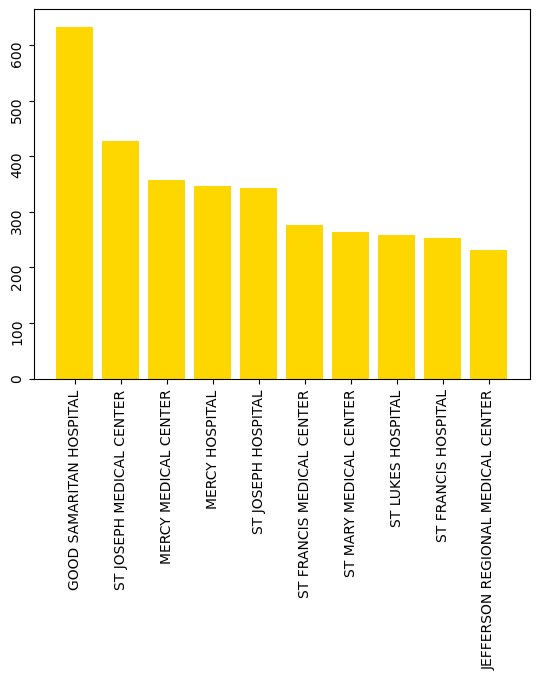

In [57]:
temp = data.groupby("Provider Name")["Provider Id"].count().sort_values(ascending=False)[:10]
print(temp)

plt.bar(temp.index, temp, color="gold")
plt.tick_params(rotation=90)

[ 0  2  4  6  8 10 12 14 16 18]


([<matplotlib.axis.XTick at 0x7fc9ba393950>,
 [Text(0.25, 0, 'ADCARE HOSPITAL OF WORCESTER INC'),
  Text(2.25, 0, 'WESTBURY COMMUNITY HOSPITAL, LLC'),
  Text(4.25, 0, 'HOSPITAL FOR SPECIAL SURGERY'),
  Text(6.25, 0, 'WOODS AT PARKSIDE,THE'),
  Text(8.25, 0, 'ARKANSAS SURGICAL HOSPITAL'),
  Text(10.25, 0, 'MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL, LLC'),
  Text(12.25, 0, 'KANSAS CITY ORTHOPAEDIC INSTITUTE'),
  Text(14.25, 0, 'FLORIDA HOSPITAL'),
  Text(16.25, 0, 'MOUNT CARMEL NEW ALBANY SURGICAL HOSPITAL'),
  Text(18.25, 0, 'KANSAS SURGERY & RECOVERY CENTER')])

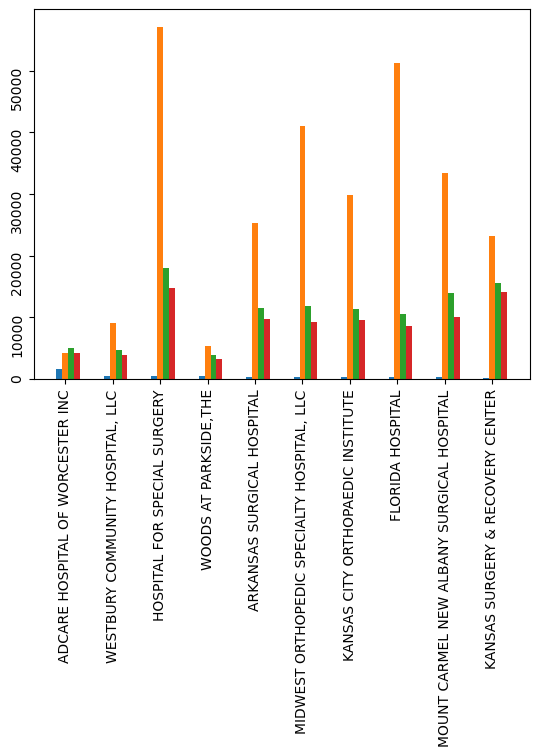

In [76]:
## Average of avg covered charges, average of avg total payments, average of average medicare payments by provider name
temp = data.groupby("Provider Name")[['Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments']].mean().sort_values(by=['Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'], ascending=False)[:10]


x = np.arange(0, len(temp.index)*2,2)
print(x)
plt.bar(x, temp["Total Discharges"], width=0.25)
plt.bar(x+0.25, temp["Average Covered Charges"], width=0.25)
plt.bar(x+0.5, temp["Average Total Payments"], width=0.25)
plt.bar(x+0.75, temp["Average Medicare Payments"],  width=0.25)
plt.tick_params(rotation=90)
plt.xticks(x+0.25, temp.index)

